## Problem Statement:
### Pedicting effective treatments  for diabetes in turn reducing the readmission into the hospital

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib as


In [5]:
data = pd.read_csv('diabetic_data.csv')
data.shape

(101766, 50)

# Data Preparation

In [6]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
data.isnull().values.any()

False

<AxesSubplot:>

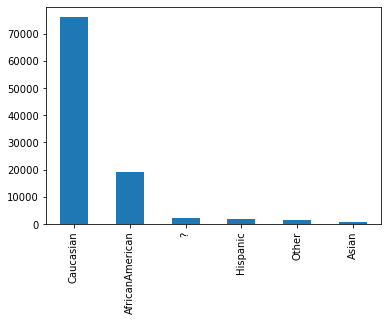

In [9]:
data.race.value_counts().plot(kind = 'bar' )

<AxesSubplot:>

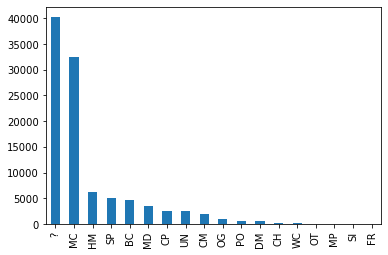

In [10]:
data.payer_code.value_counts().plot(kind = 'bar' )

In [11]:
data.medical_specialty.value_counts()

?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

<AxesSubplot:>

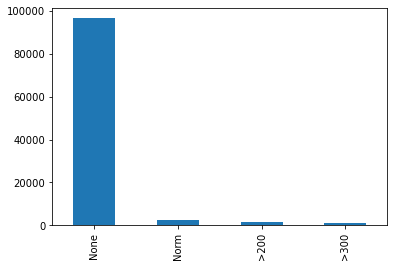

In [12]:
data.max_glu_serum.value_counts().plot(kind = 'bar' )

<AxesSubplot:>

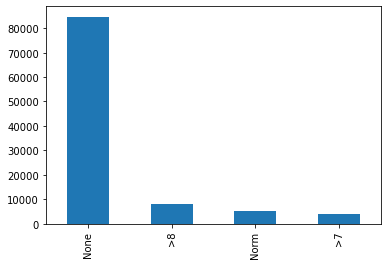

In [13]:
data.A1Cresult.value_counts().plot(kind = 'bar' )

<AxesSubplot:>

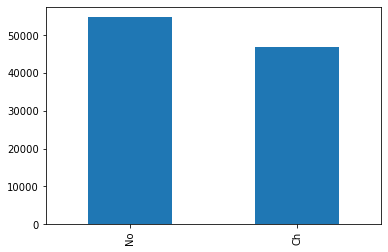

In [14]:
data.change.value_counts().plot(kind = 'bar' )

<AxesSubplot:>

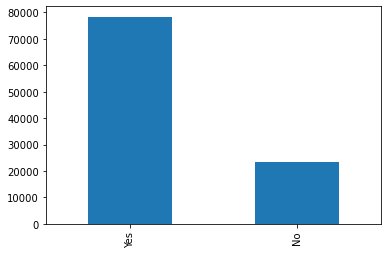

In [15]:
data.diabetesMed.value_counts().plot(kind = 'bar' )

<AxesSubplot:>

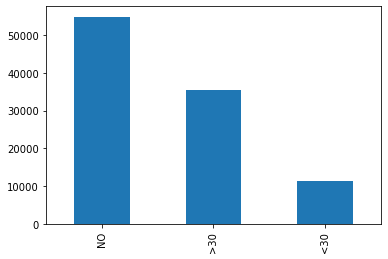

In [16]:
data.readmitted.value_counts().plot(kind = 'bar' )

<AxesSubplot:>

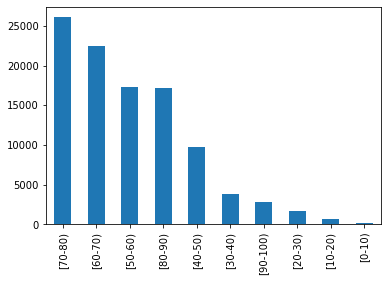

In [17]:
data.age.value_counts().plot(kind = 'bar')

## Filtering patients with Diabetes
### diabetesMed = Yes

In [18]:
data=data[data.diabetesMed=='Yes']
data.shape

(78363, 50)

## Filtering patients who didn't readmit
### readmission = NO

In [19]:
data=data[data.readmitted=='NO']
data.shape

(40934, 50)

## Excluding patients who are Dead and are in hospise

In [20]:
data=data[~data.discharge_disposition_id.isin([11,13,14,19,20])]
data.shape

(39355, 50)

# Handling Missing Values

### We can observe that, Payer code, medical speciality & weight have more than 50% of the missing data, and prefer to drop those features.

In [21]:
data = data.drop(['medical_specialty','payer_code','weight'],axis=1)

**We can observe that the "Race" Feature has some missing values**

**Missing value Imputation using MODE for Race Feature as most of the people in the Dataset are Caucasian**

##### 1. Replacing the ? with NaN's

In [22]:
data['race']=data.race.replace('?',np.nan)


##### 2. Filling the NaN's with the mode

In [23]:
data['race'].fillna(data['race'].mode()[0], inplace=True)


In [24]:
data.race.isnull().sum()

0

In [25]:
data.shape

(39355, 47)

In [26]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [27]:
treatments = data[['encounter_id','metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']].copy()

In [28]:
treatments.head()

,encounter_id,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
2,64410,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,No,No,No,No,No,No
3,500364,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
4,16680,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,Steady,No,No,No,No,No
6,55842,Steady,No,No,No,Steady,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
8,12522,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,Steady,No,No,No,No,No


# Feature Engineering

 ### Custom encoding for the 23 Drug Features


In [29]:
treatments=treatments.replace(['No','Steady','Up','Down'],[0,1,1,1])
treatments.set_index('encounter_id',inplace=True)


In [30]:
treatments.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
encounter_id,,,,,,,,,,,,,,,,,,,,,
64410,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16680,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
55842,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12522,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
treatments.sum(axis=1).value_counts()

1    23080
2    11397
3     4108
4      730
5       39
6        1
dtype: int64

# Patients are Given at max a combination of 6 drugs for treating diabetes

### Feature Engineering - Creating a new feature "Treatments"

**1. When the value of Insuin is '1' , creating the classes "insulin" & "io" (insulin + others )********

In [32]:
i1 = treatments[treatments['insulin']==1].sum(axis = 1).replace([1,2,3,4,5,6],['insulin','io','io','io','io','io'])

In [33]:
i1.value_counts()

insulin    14675
io         12145
dtype: int64

**2. When the value of Insuin is '0' , creating the classes "others" & "no med"**

In [34]:
i0=treatments[treatments['insulin']==0].sum(axis=1).replace([0,1,2,3,4,5,6],['no med','other','other','other','other','other','other'])

In [35]:
i0.value_counts()

other    12535
dtype: int64

In [36]:
treatments=pd.concat([i1,i0])
treatments = pd.DataFrame({'treatments':treatments})

In [37]:
treatments.head()

,treatments
encounter_id,
500364,insulin
16680,io
55842,io
12522,io
15738,io


**Adding the new feature to the Actual Dataframe**

In [38]:
data=data.join(treatments,on='encounter_id') #setting index as encounter_id

In [39]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,treatments
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,other
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,insulin
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,io
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,Steady,No,No,No,No,No,Ch,Yes,NO,io
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,Steady,No,No,No,No,No,Ch,Yes,NO,io


## Since the treatments column was created from the 23 Drugs, We will be removing them

In [40]:
data = data.drop(['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],axis=1)

## Choosing the records with treatments Insulin and Insulin + other ( w.r.t Problem Statement)

In [41]:
data=data[data.treatments!='other']
data.shape

(26820, 25)

In [42]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'readmitted',
       'treatments'],
      dtype='object')

# Here the features which contains numeric values are of type Discrete Quantitative and has a finite set of values. Discrete data can be both Quantitative and Qualitative. So treating outliers in this dataset is not possible

**One hot encoding the nominal categorical values**

In [43]:
data = pd.get_dummies(data, columns=['race', 'gender','max_glu_serum', 'A1Cresult', 'change',
       'diabetesMed', 'readmitted'])

In [44]:
data.head()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_Yes,readmitted_NO
3,500364,82442376,[30-40),1,1,7,2,44,1,16,...,1,0,0,0,1,0,1,0,1,1
4,16680,42519267,[40-50),1,1,7,1,51,0,8,...,1,0,0,0,1,0,1,0,1,1
6,55842,84259809,[60-70),3,1,2,4,70,1,21,...,1,0,0,0,1,0,1,0,1,1
8,12522,48330783,[80-90),2,1,4,13,68,2,28,...,1,0,0,0,1,0,1,0,1,1
9,15738,63555939,[90-100),3,3,4,12,33,3,18,...,1,0,0,0,1,0,1,0,1,1


** Encoding the AGE(ordinal) categorical column**

In [45]:
data.age.value_counts()

[70-80)     6171
[60-70)     5982
[50-60)     4986
[80-90)     3834
[40-50)     2860
[30-40)     1226
[90-100)     677
[20-30)      630
[10-20)      348
[0-10)       106
Name: age, dtype: int64

In [46]:
labels = data['age'].astype('category').cat.categories.tolist()
replace_age = {'age' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_age)

{'age': {'[0-10)': 1, '[10-20)': 2, '[20-30)': 3, '[30-40)': 4, '[40-50)': 5, '[50-60)': 6, '[60-70)': 7, '[70-80)': 8, '[80-90)': 9, '[90-100)': 10}}


In [47]:
data.replace(replace_age, inplace=True)

In [48]:
data.age.value_counts()

8     6171
7     5982
6     4986
9     3834
5     2860
4     1226
10     677
3      630
2      348
1      106
Name: age, dtype: int64

# Exploratory Data Analysis

### UNI VARIATE ANALYSIS

<AxesSubplot:ylabel='Frequency'>

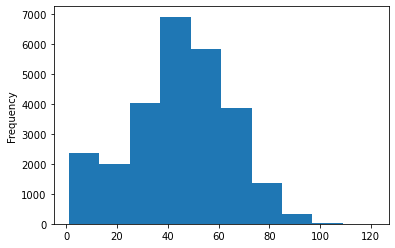

In [49]:
data.num_lab_procedures.plot(kind='hist')

C:\Users\Ashvini Alashetty\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_in_hospital', ylabel='Density'>

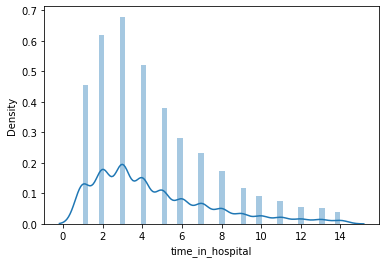

In [50]:
import seaborn as sns
sns.distplot(data.time_in_hospital)

C:\Users\Ashvini Alashetty\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


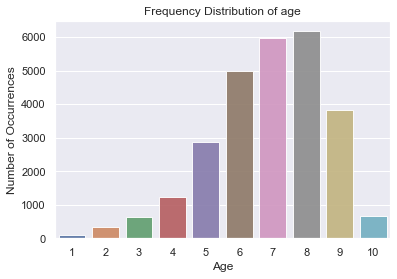

In [51]:
import matplotlib.pyplot as plt
age_count = data['age'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of age')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

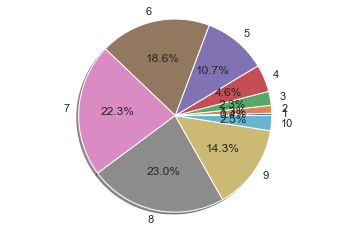

In [52]:
labels = data['age'].astype('category').cat.categories.tolist()
counts = data['age'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

# Feature Identification

In [53]:
data.columns

Index(['encounter_id', 'patient_nbr', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'treatments',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'gender_Female', 'gender_Male', 'max_glu_serum_>200',
       'max_glu_serum_>300', 'max_glu_serum_None', 'max_glu_serum_Norm',
       'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm',
       'change_Ch', 'change_No', 'diabetesMed_Yes', 'readmitted_NO'],
      dtype='object')

### Considering the Domain knowledge, we would like to drop the Columns "diag_1" , "diag_2" ,"diag_3"

##### Since they contain the information about the codes of different types of treatments given to the patient. They don't contribute to the effectiveness of the treat (i.e, our problemm statement)

In [54]:
data = data.drop(['diag_1','diag_2','diag_3'],axis = 1)

## With respect to the problem statement given, the output variable is observed to be the “treatments” feature
## The input variables are both Discrete Quantitative and Categorical and our output variable is Categorical


## Since we have a combination of Discrete Quantitative Variables and Categorical Variables, we cannot perform general Correlation tests

In [55]:
from IPython.display import Image
Image("../input/correlation/Picture1.png")

FileNotFoundError: No such file or directory: '../input/correlation/Picture1.png'

FileNotFoundError: No such file or directory: '../input/correlation/Picture1.png'

<IPython.core.display.Image object>

### We will be performing Chi-Square Test of Independence for finding the Correlation btw the variables

# Chi-Square Test of Independence

In [56]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [57]:
data['dummyCat'] = np.random.choice([0, 1], size=(len(data),), p=[0.5, 0.5])

data.dummyCat.value_counts()

0    13420
1    13400
Name: dummyCat, dtype: int64

In [58]:
#Initialize ChiSquare Class
cT = ChiSquare(data)

#Feature Selection
testColumns = ['encounter_id', 'patient_nbr', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'gender_Female', 'gender_Male',
       'max_glu_serum_>200', 'max_glu_serum_>300', 'max_glu_serum_None',
       'max_glu_serum_Norm', 'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None',
       'A1Cresult_Norm', 'change_Ch', 'change_No', 'diabetesMed_Yes',
       'readmitted_NO', 'dummyCat']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="treatments" ) 

encounter_id is NOT an important predictor. (Discard encounter_id from model)
patient_nbr is NOT an important predictor. (Discard patient_nbr from model)
age is IMPORTANT for Prediction
admission_type_id is IMPORTANT for Prediction
discharge_disposition_id is IMPORTANT for Prediction
admission_source_id is IMPORTANT for Prediction
time_in_hospital is IMPORTANT for Prediction
num_lab_procedures is NOT an important predictor. (Discard num_lab_procedures from model)
num_procedures is IMPORTANT for Prediction
num_medications is IMPORTANT for Prediction
number_outpatient is NOT an important predictor. (Discard number_outpatient from model)
number_emergency is NOT an important predictor. (Discard number_emergency from model)
number_inpatient is IMPORTANT for Prediction
number_diagnoses is IMPORTANT for Prediction
race_AfricanAmerican is IMPORTANT for Prediction
race_Asian is NOT an important predictor. (Discard race_Asian from model)
race_Caucasian is IMPORTANT for Prediction
race_Hispanic i

# Model Building
## Train Test Split

Since our target variable is Categorical , We would be importing the required Classification model packages

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
X = data.drop(['encounter_id','patient_nbr','num_lab_procedures','number_outpatient','number_emergency',
                      'race_Asian','race_Other','diabetesMed_Yes','max_glu_serum_>200','A1Cresult_>8','A1Cresult_Norm',
                      'readmitted_NO','dummyCat','treatments'],axis=1)
Y = data['treatments']
print(X.shape)
print(Y.shape)

(26820, 21)
(26820,)


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18774, 21), (8046, 21), (18774,), (8046,))

# Base Model

In [62]:
y_p=[]
for i in range(y_test.shape[0]):
    y_p.append(y_test.mode()[0])#Highest class is assigned to a list which is compared with ytest
len(y_p) 

8046

In [63]:
y_pred=pd.Series(y_p)

In [64]:
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.5437484464330102


## Our Baseline accuracy is 54% 
#### We can set the accuracy as 54% and the models we build should be giving us accuracies greater than 54%

# Predictive Model Development - Iteration 1 

## Baseline Models - Logistic Regression 

In [65]:
#Logistic Regression
m1=LogisticRegression()
m1.fit(X_train,y_train)
y_pred_lr=m1.predict(X_test)
Train_Score_lr = m1.score(X_train,y_train)
Test_Score_lr = accuracy_score(y_test,y_pred_lr)


print('Training Accuracy is:',Train_Score_lr)
print('Testing Accuracy is:',Test_Score_lr)
print(classification_report(y_test,y_pred_lr))

C:\Users\Ashvini Alashetty\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is: 0.7742622776179823
Testing Accuracy is: 0.767710663683818
              precision    recall  f1-score   support

     insulin       0.94      0.61      0.74      4375
          io       0.67      0.96      0.79      3671

    accuracy                           0.77      8046
   macro avg       0.81      0.78      0.77      8046
weighted avg       0.82      0.77      0.76      8046



## KNN

In [66]:
m2 = KNeighborsClassifier()
m2.fit(X_train,y_train)
y_pred_knn = m2.predict(X_test)
Train_Score_knn = m2.score(X_train,y_train)
Test_Score_knn = accuracy_score(y_test,y_pred_knn)

print('Training Accuracy is :',Train_Score_knn)
print('Testing Accuracy is:',Test_Score_knn)
print(classification_report(y_test,y_pred_knn))


Training Accuracy is : 0.7978587408117609
Testing Accuracy is: 0.6731295053442704
              precision    recall  f1-score   support

     insulin       0.72      0.65      0.68      4375
          io       0.63      0.70      0.66      3671

    accuracy                           0.67      8046
   macro avg       0.67      0.68      0.67      8046
weighted avg       0.68      0.67      0.67      8046



## Bernoulli Naives Bayes

In [67]:
m3=BernoulliNB()
m3.fit(X_train,y_train)
y_pred_bnb=m3.predict(X_test)
Train_Score_bnb = m3.score(X_train,y_train)
Test_Score_bnb = accuracy_score(y_test,y_pred_bnb)

print('Training Accuracy :',Train_Score_bnb)
print('Testing Accuracy  :',Test_Score_bnb)
print(classification_report(y_test,y_pred_bnb))

Training Accuracy : 0.7635559816767871
Testing Accuracy  : 0.7555306984837186
              precision    recall  f1-score   support

     insulin       1.00      0.55      0.71      4375
          io       0.65      1.00      0.79      3671

    accuracy                           0.76      8046
   macro avg       0.83      0.78      0.75      8046
weighted avg       0.84      0.76      0.75      8046



## Decision Trees

In [68]:
m4 = DecisionTreeClassifier()
m4.fit(X_train,y_train)
y_pred_dt=m4.predict(X_test)
Train_Score_dt = m4.score(X_train,y_train)
Test_Score_dt = accuracy_score(y_test,y_pred_dt)

print('Training Accuracy :',Train_Score_dt)
print('Testing Accuracy :',Test_Score_dt)
print(classification_report(y_test,y_pred_dt))

Training Accuracy : 0.9965910301480772
Testing Accuracy : 0.6978622918220234
              precision    recall  f1-score   support

     insulin       0.72      0.74      0.73      4375
          io       0.67      0.65      0.66      3671

    accuracy                           0.70      8046
   macro avg       0.70      0.69      0.69      8046
weighted avg       0.70      0.70      0.70      8046



## Random Forest

In [69]:
m5 = RandomForestClassifier()
m5.fit(X_train,y_train)
y_pred_rf=m5.predict(X_test)
Train_Score_rf = m5.score(X_train,y_train)
Test_Score_rf = accuracy_score(y_test,y_pred_rf)

print('Training Accuracy :',Train_Score_rf)
print('Testing Accuracy :',Test_Score_rf)
print(classification_report(y_test,y_pred_rf))

Training Accuracy : 0.9965910301480772
Testing Accuracy : 0.7525478498632862
              precision    recall  f1-score   support

     insulin       0.84      0.67      0.75      4375
          io       0.68      0.85      0.76      3671

    accuracy                           0.75      8046
   macro avg       0.76      0.76      0.75      8046
weighted avg       0.77      0.75      0.75      8046



# Predictive Model Development - Iteration 2

## Hyperparameter Tuning

### For Decision Tree

In [70]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy')

In [71]:
tree.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [72]:
m6 = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=50,min_samples_split=50)
m6.fit(X_train,y_train)
y_pred_tdt=m6.predict(X_test)
Train_Score_tdt = m6.score(X_train,y_train)
Test_Score_tdt = accuracy_score(y_test,y_pred_tdt)

print('Training Accuracy :',Train_Score_tdt)
print('Testing Accuracy  :',Test_Score_tdt)
print(classification_report(y_test,y_pred_tdt))


Training Accuracy : 0.7775647171620326
Testing Accuracy  : 0.7672135222470793
              precision    recall  f1-score   support

     insulin       0.95      0.60      0.74      4375
          io       0.67      0.97      0.79      3671

    accuracy                           0.77      8046
   macro avg       0.81      0.78      0.76      8046
weighted avg       0.82      0.77      0.76      8046



### For KNN

In [73]:
#Gridsearch CV to find Optimal K value for KNN model
grid = {'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=3)
knn_cv.fit(X_train,y_train)


print("Tuned Hyperparameter k: {}".format(knn_cv.best_params_))

Tuned Hyperparameter k: {'n_neighbors': 35}


In [74]:
m7 = KNeighborsClassifier(n_neighbors=19)
m7.fit(X_train,y_train)
y_pred_tknn=m7.predict(X_test)
Train_Score_tknn = m7.score(X_train,y_train)
Test_Score_tknn = accuracy_score(y_test,y_pred_tknn)


print('Training Accuracy :',Train_Score_tknn)
print('Testing Accuracy  :',Test_Score_tknn)
print(classification_report(y_test,y_pred_tknn))

Training Accuracy : 0.7453392990305742
Testing Accuracy  : 0.6971165796669152
              precision    recall  f1-score   support

     insulin       0.75      0.66      0.70      4375
          io       0.65      0.75      0.69      3671

    accuracy                           0.70      8046
   macro avg       0.70      0.70      0.70      8046
weighted avg       0.70      0.70      0.70      8046



### For Random Forest 

In [75]:
parameter={'n_estimators':np.arange(1,101)}
gs = GridSearchCV(m5,parameter,cv=3)
gs.fit(X_train,y_train)
gs.best_params_



{'n_estimators': 83}

In [76]:
m8 = RandomForestClassifier(n_estimators=73)
m8.fit(X_train,y_train) 
y_pred_trf=m8.predict(X_test)
Train_Score_trf = m8.score(X_train,y_train)
Test_Score_trf = accuracy_score(y_test,y_pred_trf)


print('Training Accuracy :',Train_Score_trf)
print('Testing Accuracy  :',Test_Score_trf)
print(classification_report(y_test,y_pred_trf))

Training Accuracy : 0.9964844998402045
Testing Accuracy  : 0.7562764106388268
              precision    recall  f1-score   support

     insulin       0.85      0.68      0.75      4375
          io       0.69      0.85      0.76      3671

    accuracy                           0.76      8046
   macro avg       0.77      0.76      0.76      8046
weighted avg       0.77      0.76      0.76      8046



# Predictive Model Development - Iteration 3 

## CatBoostClassifier

In [77]:
data.treatments.replace(['insulin','io'],[0,1],inplace = True)

In [78]:
a = data.drop(['age','treatments'],axis=1)
b = data.treatments

In [79]:
cate_features_index = np.where(a.dtypes != int)[0]


In [80]:
xtrain,xtest,ytrain,ytest = train_test_split(a,b,train_size=.70,random_state=2)


In [81]:
from catboost import CatBoostClassifier, Pool,cv
#let us make the catboost model, use_best_model params will make the model prevent overfitting
model = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)

In [82]:
model.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest))

Learning rate set to 0.065385
0:	learn: 0.7635560	test: 0.7555307	best: 0.7555307 (0)	total: 342ms	remaining: 5m 41s
1:	learn: 0.7635560	test: 0.7555307	best: 0.7555307 (0)	total: 408ms	remaining: 3m 23s
2:	learn: 0.7636092	test: 0.7555307	best: 0.7555307 (0)	total: 495ms	remaining: 2m 44s
3:	learn: 0.7635560	test: 0.7555307	best: 0.7555307 (0)	total: 534ms	remaining: 2m 12s
4:	learn: 0.7636092	test: 0.7556550	best: 0.7556550 (4)	total: 603ms	remaining: 2m
5:	learn: 0.7636092	test: 0.7556550	best: 0.7556550 (4)	total: 675ms	remaining: 1m 51s
6:	learn: 0.7636092	test: 0.7556550	best: 0.7556550 (4)	total: 747ms	remaining: 1m 45s
7:	learn: 0.7636625	test: 0.7556550	best: 0.7556550 (4)	total: 811ms	remaining: 1m 40s
8:	learn: 0.7636092	test: 0.7556550	best: 0.7556550 (4)	total: 875ms	remaining: 1m 36s
9:	learn: 0.7636092	test: 0.7556550	best: 0.7556550 (4)	total: 929ms	remaining: 1m 31s
10:	learn: 0.7636625	test: 0.7556550	best: 0.7556550 (4)	total: 996ms	remaining: 1m 29s
11:	learn: 0.763

94:	learn: 0.7771919	test: 0.7597564	best: 0.7608750 (68)	total: 7.2s	remaining: 1m 8s
95:	learn: 0.7772451	test: 0.7600050	best: 0.7608750 (68)	total: 7.3s	remaining: 1m 8s
96:	learn: 0.7771919	test: 0.7600050	best: 0.7608750 (68)	total: 7.39s	remaining: 1m 8s
97:	learn: 0.7772984	test: 0.7601293	best: 0.7608750 (68)	total: 7.47s	remaining: 1m 8s
98:	learn: 0.7774049	test: 0.7598807	best: 0.7608750 (68)	total: 7.58s	remaining: 1m 8s
99:	learn: 0.7776712	test: 0.7605021	best: 0.7608750 (68)	total: 7.67s	remaining: 1m 9s
100:	learn: 0.7777245	test: 0.7600050	best: 0.7608750 (68)	total: 7.77s	remaining: 1m 9s
101:	learn: 0.7776180	test: 0.7598807	best: 0.7608750 (68)	total: 7.84s	remaining: 1m 8s
102:	learn: 0.7780441	test: 0.7602535	best: 0.7608750 (68)	total: 7.92s	remaining: 1m 9s
103:	learn: 0.7780974	test: 0.7602535	best: 0.7608750 (68)	total: 8s	remaining: 1m 8s
104:	learn: 0.7780974	test: 0.7606264	best: 0.7608750 (68)	total: 8.07s	remaining: 1m 8s
105:	learn: 0.7782572	test: 0.76

187:	learn: 0.7858208	test: 0.7613721	best: 0.7617450 (186)	total: 16s	remaining: 1m 9s
188:	learn: 0.7859806	test: 0.7614964	best: 0.7617450 (186)	total: 16.2s	remaining: 1m 9s
189:	learn: 0.7860339	test: 0.7616207	best: 0.7617450 (186)	total: 16.3s	remaining: 1m 9s
190:	learn: 0.7858208	test: 0.7614964	best: 0.7617450 (186)	total: 16.4s	remaining: 1m 9s
191:	learn: 0.7858741	test: 0.7613721	best: 0.7617450 (186)	total: 16.5s	remaining: 1m 9s
192:	learn: 0.7860339	test: 0.7609993	best: 0.7617450 (186)	total: 16.6s	remaining: 1m 9s
193:	learn: 0.7861404	test: 0.7608750	best: 0.7617450 (186)	total: 16.7s	remaining: 1m 9s
194:	learn: 0.7862469	test: 0.7606264	best: 0.7617450 (186)	total: 16.8s	remaining: 1m 9s
195:	learn: 0.7860871	test: 0.7608750	best: 0.7617450 (186)	total: 16.9s	remaining: 1m 9s
196:	learn: 0.7863535	test: 0.7606264	best: 0.7617450 (186)	total: 17s	remaining: 1m 9s
197:	learn: 0.7866198	test: 0.7609993	best: 0.7617450 (186)	total: 17.1s	remaining: 1m 9s
198:	learn: 0.

279:	learn: 0.7917865	test: 0.7618693	best: 0.7623664 (277)	total: 26s	remaining: 1m 6s
280:	learn: 0.7918930	test: 0.7618693	best: 0.7623664 (277)	total: 26.2s	remaining: 1m 6s
281:	learn: 0.7922659	test: 0.7618693	best: 0.7623664 (277)	total: 26.3s	remaining: 1m 6s
282:	learn: 0.7925855	test: 0.7624907	best: 0.7624907 (282)	total: 26.4s	remaining: 1m 6s
283:	learn: 0.7927453	test: 0.7623664	best: 0.7624907 (282)	total: 26.5s	remaining: 1m 6s
284:	learn: 0.7927453	test: 0.7622421	best: 0.7624907 (282)	total: 26.7s	remaining: 1m 6s
285:	learn: 0.7928518	test: 0.7621178	best: 0.7624907 (282)	total: 26.7s	remaining: 1m 6s
286:	learn: 0.7929583	test: 0.7619935	best: 0.7624907 (282)	total: 26.8s	remaining: 1m 6s
287:	learn: 0.7930116	test: 0.7619935	best: 0.7624907 (282)	total: 26.9s	remaining: 1m 6s
288:	learn: 0.7928518	test: 0.7619935	best: 0.7624907 (282)	total: 27s	remaining: 1m 6s
289:	learn: 0.7930649	test: 0.7621178	best: 0.7624907 (282)	total: 27.1s	remaining: 1m 6s
290:	learn: 0.

371:	learn: 0.7982316	test: 0.7626150	best: 0.7631121 (330)	total: 35.3s	remaining: 59.5s
372:	learn: 0.7984447	test: 0.7628635	best: 0.7631121 (330)	total: 35.4s	remaining: 59.5s
373:	learn: 0.7987110	test: 0.7628635	best: 0.7631121 (330)	total: 35.5s	remaining: 59.5s
374:	learn: 0.7985512	test: 0.7623664	best: 0.7631121 (330)	total: 35.7s	remaining: 59.4s
375:	learn: 0.7986045	test: 0.7624907	best: 0.7631121 (330)	total: 35.8s	remaining: 59.4s
376:	learn: 0.7986045	test: 0.7626150	best: 0.7631121 (330)	total: 35.9s	remaining: 59.4s
377:	learn: 0.7986577	test: 0.7628635	best: 0.7631121 (330)	total: 36s	remaining: 59.3s
378:	learn: 0.7989773	test: 0.7627392	best: 0.7631121 (330)	total: 36.1s	remaining: 59.2s
379:	learn: 0.7990838	test: 0.7623664	best: 0.7631121 (330)	total: 36.2s	remaining: 59.1s
380:	learn: 0.7991371	test: 0.7627392	best: 0.7631121 (330)	total: 36.4s	remaining: 59.1s
381:	learn: 0.7992436	test: 0.7626150	best: 0.7631121 (330)	total: 36.5s	remaining: 59.1s
382:	learn: 

465:	learn: 0.8064344	test: 0.7634850	best: 0.7652250 (424)	total: 45.5s	remaining: 52.1s
466:	learn: 0.8067008	test: 0.7633607	best: 0.7652250 (424)	total: 45.6s	remaining: 52.1s
467:	learn: 0.8065410	test: 0.7636092	best: 0.7652250 (424)	total: 45.7s	remaining: 52s
468:	learn: 0.8065942	test: 0.7636092	best: 0.7652250 (424)	total: 45.9s	remaining: 51.9s
469:	learn: 0.8070203	test: 0.7637335	best: 0.7652250 (424)	total: 46s	remaining: 51.9s
470:	learn: 0.8067540	test: 0.7638578	best: 0.7652250 (424)	total: 46.1s	remaining: 51.8s
471:	learn: 0.8071269	test: 0.7637335	best: 0.7652250 (424)	total: 46.3s	remaining: 51.8s
472:	learn: 0.8071269	test: 0.7639821	best: 0.7652250 (424)	total: 46.4s	remaining: 51.7s
473:	learn: 0.8072334	test: 0.7638578	best: 0.7652250 (424)	total: 46.6s	remaining: 51.7s
474:	learn: 0.8072334	test: 0.7637335	best: 0.7652250 (424)	total: 46.7s	remaining: 51.6s
475:	learn: 0.8071801	test: 0.7638578	best: 0.7652250 (424)	total: 46.8s	remaining: 51.6s
476:	learn: 0.

558:	learn: 0.8124001	test: 0.7636092	best: 0.7652250 (424)	total: 55.6s	remaining: 43.8s
559:	learn: 0.8126665	test: 0.7634850	best: 0.7652250 (424)	total: 55.7s	remaining: 43.8s
560:	learn: 0.8127197	test: 0.7637335	best: 0.7652250 (424)	total: 55.8s	remaining: 43.7s
561:	learn: 0.8129328	test: 0.7633607	best: 0.7652250 (424)	total: 56s	remaining: 43.6s
562:	learn: 0.8129328	test: 0.7631121	best: 0.7652250 (424)	total: 56.1s	remaining: 43.5s
563:	learn: 0.8128795	test: 0.7631121	best: 0.7652250 (424)	total: 56.2s	remaining: 43.5s
564:	learn: 0.8129328	test: 0.7631121	best: 0.7652250 (424)	total: 56.3s	remaining: 43.3s
565:	learn: 0.8129328	test: 0.7631121	best: 0.7652250 (424)	total: 56.4s	remaining: 43.3s
566:	learn: 0.8129328	test: 0.7631121	best: 0.7652250 (424)	total: 56.6s	remaining: 43.2s
567:	learn: 0.8129860	test: 0.7632364	best: 0.7652250 (424)	total: 56.7s	remaining: 43.1s
568:	learn: 0.8128795	test: 0.7633607	best: 0.7652250 (424)	total: 56.8s	remaining: 43.1s
569:	learn: 

652:	learn: 0.8183126	test: 0.7637335	best: 0.7652250 (424)	total: 1m 6s	remaining: 35.5s
653:	learn: 0.8186854	test: 0.7637335	best: 0.7652250 (424)	total: 1m 6s	remaining: 35.4s
654:	learn: 0.8185256	test: 0.7636092	best: 0.7652250 (424)	total: 1m 7s	remaining: 35.3s
655:	learn: 0.8186322	test: 0.7637335	best: 0.7652250 (424)	total: 1m 7s	remaining: 35.2s
656:	learn: 0.8185789	test: 0.7634850	best: 0.7652250 (424)	total: 1m 7s	remaining: 35.2s
657:	learn: 0.8185789	test: 0.7631121	best: 0.7652250 (424)	total: 1m 7s	remaining: 35.1s
658:	learn: 0.8183658	test: 0.7629878	best: 0.7652250 (424)	total: 1m 7s	remaining: 35s
659:	learn: 0.8185256	test: 0.7631121	best: 0.7652250 (424)	total: 1m 7s	remaining: 34.9s
660:	learn: 0.8185256	test: 0.7629878	best: 0.7652250 (424)	total: 1m 7s	remaining: 34.7s
661:	learn: 0.8186854	test: 0.7628635	best: 0.7652250 (424)	total: 1m 7s	remaining: 34.7s
662:	learn: 0.8190050	test: 0.7632364	best: 0.7652250 (424)	total: 1m 8s	remaining: 34.6s
663:	learn: 

744:	learn: 0.8243315	test: 0.7637335	best: 0.7652250 (424)	total: 1m 17s	remaining: 26.7s
745:	learn: 0.8241717	test: 0.7639821	best: 0.7652250 (424)	total: 1m 18s	remaining: 26.6s
746:	learn: 0.8242783	test: 0.7638578	best: 0.7652250 (424)	total: 1m 18s	remaining: 26.4s
747:	learn: 0.8243848	test: 0.7636092	best: 0.7652250 (424)	total: 1m 18s	remaining: 26.3s
748:	learn: 0.8242783	test: 0.7637335	best: 0.7652250 (424)	total: 1m 18s	remaining: 26.2s
749:	learn: 0.8241717	test: 0.7636092	best: 0.7652250 (424)	total: 1m 18s	remaining: 26.1s
750:	learn: 0.8242783	test: 0.7634850	best: 0.7652250 (424)	total: 1m 18s	remaining: 26s
751:	learn: 0.8241717	test: 0.7634850	best: 0.7652250 (424)	total: 1m 18s	remaining: 25.9s
752:	learn: 0.8241185	test: 0.7639821	best: 0.7652250 (424)	total: 1m 18s	remaining: 25.8s
753:	learn: 0.8241717	test: 0.7639821	best: 0.7652250 (424)	total: 1m 18s	remaining: 25.7s
754:	learn: 0.8243315	test: 0.7638578	best: 0.7652250 (424)	total: 1m 19s	remaining: 25.6s
7

836:	learn: 0.8320017	test: 0.7624907	best: 0.7652250 (424)	total: 1m 28s	remaining: 17.2s
837:	learn: 0.8320550	test: 0.7623664	best: 0.7652250 (424)	total: 1m 28s	remaining: 17.1s
838:	learn: 0.8320550	test: 0.7628635	best: 0.7652250 (424)	total: 1m 28s	remaining: 17s
839:	learn: 0.8320550	test: 0.7628635	best: 0.7652250 (424)	total: 1m 28s	remaining: 16.9s
840:	learn: 0.8317886	test: 0.7628635	best: 0.7652250 (424)	total: 1m 28s	remaining: 16.8s
841:	learn: 0.8318419	test: 0.7627392	best: 0.7652250 (424)	total: 1m 29s	remaining: 16.7s
842:	learn: 0.8318419	test: 0.7626150	best: 0.7652250 (424)	total: 1m 29s	remaining: 16.6s
843:	learn: 0.8320017	test: 0.7626150	best: 0.7652250 (424)	total: 1m 29s	remaining: 16.5s
844:	learn: 0.8315756	test: 0.7628635	best: 0.7652250 (424)	total: 1m 29s	remaining: 16.4s
845:	learn: 0.8317886	test: 0.7629878	best: 0.7652250 (424)	total: 1m 29s	remaining: 16.3s
846:	learn: 0.8318419	test: 0.7631121	best: 0.7652250 (424)	total: 1m 29s	remaining: 16.2s
8

927:	learn: 0.8367423	test: 0.7609993	best: 0.7652250 (424)	total: 1m 38s	remaining: 7.67s
928:	learn: 0.8367956	test: 0.7612478	best: 0.7652250 (424)	total: 1m 39s	remaining: 7.57s
929:	learn: 0.8369021	test: 0.7612478	best: 0.7652250 (424)	total: 1m 39s	remaining: 7.46s
930:	learn: 0.8369554	test: 0.7612478	best: 0.7652250 (424)	total: 1m 39s	remaining: 7.36s
931:	learn: 0.8373815	test: 0.7611235	best: 0.7652250 (424)	total: 1m 39s	remaining: 7.25s
932:	learn: 0.8373282	test: 0.7613721	best: 0.7652250 (424)	total: 1m 39s	remaining: 7.14s
933:	learn: 0.8373815	test: 0.7617450	best: 0.7652250 (424)	total: 1m 39s	remaining: 7.04s
934:	learn: 0.8375945	test: 0.7616207	best: 0.7652250 (424)	total: 1m 39s	remaining: 6.93s
935:	learn: 0.8375945	test: 0.7612478	best: 0.7652250 (424)	total: 1m 39s	remaining: 6.83s
936:	learn: 0.8376478	test: 0.7612478	best: 0.7652250 (424)	total: 1m 40s	remaining: 6.72s
937:	learn: 0.8377543	test: 0.7612478	best: 0.7652250 (424)	total: 1m 40s	remaining: 6.62s

In [83]:
#show the model test acc, but you have to note that the acc is not the cv acc,
#so recommend to use the cv acc to evaluate your model!
print('the test accuracy is :{:.6f}'.format(accuracy_score(ytest,model.predict(xtest))))
test_score_catboost = accuracy_score(ytest,model.predict(xtest))
print("the train accuracy is :",model.score(xtrain,ytrain))
train_score_catboost = model.score(xtrain,ytrain)

the test accuracy is :0.765225
the train accuracy is : 0.9285181634174923


In [84]:
model.predict(xtest)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [85]:
Model_Scores=pd.DataFrame({'Models':['Logistic Regression','KNN','Bernauli Naives Bayes','Decision Tree','Random Forest','Tuned Decison Tree','Tuned KNN','Tuned Random Forest','Cat Boost'],
             'Training Accuracy':[Train_Score_lr,Train_Score_knn,Train_Score_bnb,Train_Score_dt,Train_Score_rf,Train_Score_tdt,Train_Score_tknn,Train_Score_trf,train_score_catboost],
             'Testing Accuracy':[Test_Score_lr,Test_Score_knn,Test_Score_bnb,Test_Score_dt,Test_Score_rf,Test_Score_tdt,Test_Score_tknn,Test_Score_trf,test_score_catboost],
                })

Model_Scores.sort_values(by=('Testing Accuracy'),ascending=False)

,Models,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.774262,0.767711
5,Tuned Decison Tree,0.777565,0.767214
8,Cat Boost,0.928518,0.765225
7,Tuned Random Forest,0.996484,0.756276
2,Bernauli Naives Bayes,0.763556,0.755531
4,Random Forest,0.996591,0.752548
3,Decision Tree,0.996591,0.697862
6,Tuned KNN,0.745339,0.697117
1,KNN,0.797859,0.673130
